In [8]:
import cv2
import numpy as np
from importnb import Notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.fft as fft
import numpy.matlib
from skimage.transform import rotate
import sys

In [9]:
with Notebook(): 
        import utils
        import pinkNoise

In [10]:
def blurLegend(directions, magnitude):
    norm = mpl.colors.Normalize(0, np.pi)
    plt.imshow(norm(directions))
    plt.show()

In [11]:
def findPatchKernel(img, r_min=10, r_max=30, inc_ang=5):
    mse = float('inf')
    opt_r, opt_theta = 1, 0
    for r in range(r_min, r_max):
        for theta in range(0, 180, inc_ang):
            blur = utils.linearBlur(img, r, theta)
            err = utils.MSELoss(img, blur)
            if err < mse:
                mse = err
                opt_r, opt_theta = r, theta
    return opt_r, opt_theta

In [12]:
def getImageBlurEstimate(img, patch_size = 30):
    blurField = np.zeros(img.shape)
    magnitude = np.zeros(img.shape)
    pd = patch_size // 2
    img = np.pad(img, ((pd, pd), (pd, pd)), 'reflect')
    
    for i in range(pd, img.shape[0]-pd):
        for j in range(pd, img.shape[1]-pd):
            print(i-pd, j-pd, end = '\r')
            magnitude[i-pd,j-pd], blurField[i-pd,j-pd] = findPatchKernel(img[i-pd:i+pd,j-pd:j+pd], 10, 11, 15)
    
    return magnitude, blurField

# TESTING

image ./resources/building.jpg loaded
15.91076237794596


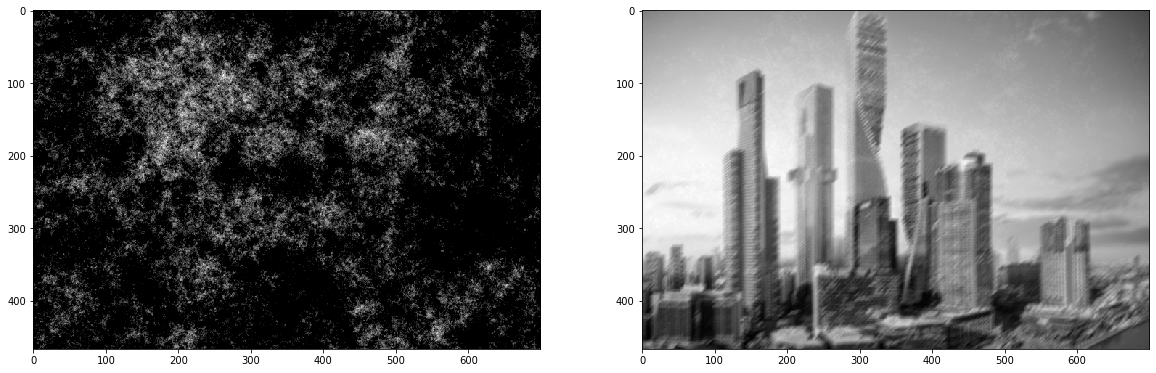

In [13]:
# img = utils.loadImage('./resources/blu.png', 'gray')
# img = utils.loadImage('./resources/building.jpg', 'gray')
# blurred_img = utils.linearBlur(img, 10, 45)
# noise, noised_img = pinkNoise.addNoise(blurred_img, exponent = -1)

# _, plots = plt.subplots(1,2,figsize=(20,20))
# plots[0].imshow(noise, cmap = 'gray')
# plots[1].imshow(noised_img, cmap = 'gray')
# plt.show()



In [14]:
# magnitude, directions = getImageBlurEstimate(noised_img[100:250,200:350])


KeyboardInterrupt: 

In [ ]:
# blurLegend(directions, magnitude)
# np.set_printoptions(threshold=sys.maxsize)
# print((directions==45).sum()/(150*150))